---

# Lib

In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import re

from sklearn.preprocessing import MultiLabelBinarizer

from utils.other import parse_label

---

# Read file

In [25]:
df = pd.read_csv("../data/raw/train.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

---

# Eda

---

# Label

In [26]:
df.head()

,brand,model,version,year,segment,comment,label
0,hyundai,creta,n line,2025,suv,"Mẫu này đẹp và hiện đại hơn, mặt đồng hồ trung...",{EXTERIOR#Positive};{INTERIOR#Negative};
1,hyundai,creta,n line,2025,suv,Creta vẫn nên phải ở tầm giá Xforce hoặc thấp ...,{COST#Neutral};{EXTERIOR#Neutral};
2,hyundai,creta,n line,2025,suv,"Giá như cx5 dl, mặc dù con này rộng hơn và k s...",{COST#Positive};
3,hyundai,creta,n line,2025,suv,Giá cao quá đợi chương trình khuyến mại thôi,{COST#Negative};
4,hyundai,creta,n line,2025,suv,Creta là một trong những con xe mượt mà nhất c...,{EXTERIOR#Positive};{INTERIOR#Positive};{PERFO...


In [27]:
df.drop(columns=['brand', 'model', 'version', 'year', 'segment'], inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  908 non-null    object
 1   label    908 non-null    object
dtypes: object(2)
memory usage: 14.3+ KB


In [29]:
df.isnull().sum()

comment    0
label      0
dtype: int64

In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
df.head()

,comment,label
0,"Mẫu này đẹp và hiện đại hơn, mặt đồng hồ trung...",{EXTERIOR#Positive};{INTERIOR#Negative};
1,Creta vẫn nên phải ở tầm giá Xforce hoặc thấp ...,{COST#Neutral};{EXTERIOR#Neutral};
2,"Giá như cx5 dl, mặc dù con này rộng hơn và k s...",{COST#Positive};
3,Giá cao quá đợi chương trình khuyến mại thôi,{COST#Negative};
4,Creta là một trong những con xe mượt mà nhất c...,{EXTERIOR#Positive};{INTERIOR#Positive};{PERFO...


## Parsed label

In [32]:
df["parsed_labels"] = df["label"].apply(parse_label)

In [33]:
print(df['parsed_labels'].head())
print()
print(df['parsed_labels'].iloc[0])

0               [EXTERIOR#Positive, INTERIOR#Negative]
1                     [COST#Neutral, EXTERIOR#Neutral]
2                                      [COST#Positive]
3                                      [COST#Negative]
4    [EXTERIOR#Positive, INTERIOR#Positive, PERFORM...
Name: parsed_labels, dtype: object

['EXTERIOR#Positive', 'INTERIOR#Negative']


## Create binary matrix for multi-label classification

### Use `MultiLabelBinarizer()`

In [34]:
mlb = MultiLabelBinarizer()

In [35]:
# Create binary matrix for multi-label classification
matrix_label_train = mlb.fit_transform(df['parsed_labels'])

In [36]:
y_df = pd.DataFrame(matrix_label_train, columns=mlb.classes_)
y_df.head()

,BRAND#Negative,BRAND#Neutral,BRAND#Positive,COST#Negative,COST#Neutral,COST#Positive,EXTERIOR#Negative,EXTERIOR#Neutral,EXTERIOR#Positive,FEATURES#Negative,FEATURES#Neutral,FEATURES#Positive,INTERIOR#Negative,INTERIOR#Neutral,INTERIOR#Positive,PERFORMANCE#Negative,PERFORMANCE#Neutral,PERFORMANCE#Positive
0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [37]:
# Count positives per label (column-wise) and total labels
label_counts = y_df.sum(axis=0).sort_values(ascending=False)
total_labels = int(y_df.values.sum())

In [38]:
print(f"Unique labels: {mlb.classes_}")

Unique labels: ['BRAND#Negative' 'BRAND#Neutral' 'BRAND#Positive' 'COST#Negative'
 'COST#Neutral' 'COST#Positive' 'EXTERIOR#Negative' 'EXTERIOR#Neutral'
 'EXTERIOR#Positive' 'FEATURES#Negative' 'FEATURES#Neutral'
 'FEATURES#Positive' 'INTERIOR#Negative' 'INTERIOR#Neutral'
 'INTERIOR#Positive' 'PERFORMANCE#Negative' 'PERFORMANCE#Neutral'
 'PERFORMANCE#Positive']


In [39]:
print(f"Total labels in training set: {total_labels}")

Total labels in training set: 1393


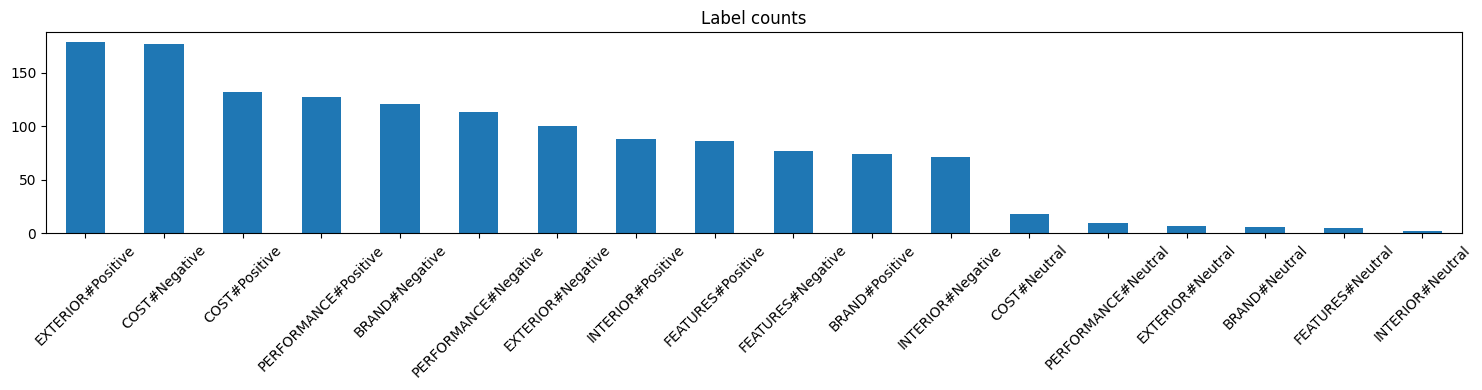

In [40]:
label_counts.plot(kind='bar', figsize=(15,4), title='Label counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()